# $Simulated$   $Annealing$

- Simulated Annealing (SA) mimics the Physical Annealing process but is used for optimizing parameters in a model. 
>
- This process is very useful for situations where there are a lot of local minima such that algorithms like Gradient Descent would be stuck at.
>
&emsp; &emsp; <img aria-describedby="caption-attachment-1047743" class="wp-image-1047743" src="https://miro.medium.com/v2/resize:fit:600/format:webp/1*iXV2btukAUcn5lfd-ZjU7A.png">
>
- In problems like this, if Gradient Descent started at the starting point indicated, it would be stuck at the local minima and not be able to reach the global minima.

## $Algorithm$ $:$
- We first start with an initial solution s = S₀. This can be any solution that fits the criteria for an acceptable solution. We also start with an initial temperature t = t₀.
>
- Setup a temperature reduction function alpha. There are usually 3 main types of temperature reduction rules:
>
&emsp; &emsp; <img aria-describedby="caption-attachment-1047743" class="wp-image-1047743" src="https://miro.medium.com/v2/resize:fit:600/format:webp/1*v2XktDqca_Y6l53tyOV2Hg.png">
>
&emsp; &emsp; Each reduction rule reduces the temperature at a different rate 
>
&emsp; &emsp; Each method is better at  optimizing a different type of model. For the 3rd rule, beta is an arbitrary constant.
>
- Starting at the initial temperature, loop through n iterations of Step 4 and then decrease the temperature according to alpha. Stop this loop until the termination conditions are reached. The termination conditions could be reaching some end temperature, reaching some acceptable threshold of performance for a given set of parameters, etc. The mapping of time to temperature and how fast the temperature decreases is called the Annealing Schedule.
>
- Given the neighbourhood of solutions N(s), pick one of the solutions and calculate the difference in cost between the old solution and the new neighbour solution. The neighbourhood of a solution are all solutions that are close to the solution. For example, the neighbourhood of a set of 5 parameters might be if we were to change one of the five parameters but kept the remaining four the same.
>
- If the difference in cost between the old and new solution is greater than 0 (the new solution is better), then accept the new solution. If the difference in cost is less than 0 (the old solution is better), then generate a random number between 0 and 1 and accept it if it’s under the value calculated from the Energy Magnitude equation from before.
>
- In the Simulated Annealing case, the equation has been altered to the following:
>
&emsp; &emsp; <img aria-describedby="caption-attachment-1047743" class="wp-image-1047743" src="https://miro.medium.com/v2/resize:fit:600/format:webp/1*8QZWw1Rrj3pigx3MKMPzbg.png">
>
&emsp; &emsp; Where the delta c is the change in cost and the t is the current temperature.
>
&emsp; &emsp; The P calculated in this case is the probability that we should accept the new solution.

In [2]:
import pandas as pd
import random
import math
import numpy as np
from sympy import *
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

- Suppose we are given f(x,y) = 500 - 20x - 26y where x lies in range [-2,10] and x2 lies in range [-1,11].
>
- Now using simulated anneling we have to minimize f on at least 3 temp. considering 2 iterations per temp.
>

In [9]:
# define the function to find the neighbors
def find_neighbors(x1, x2):
    neighbors = []
    neighbors.append([x1 + 1, x2])
    neighbors.append([x1 - 1, x2])
    neighbors.append([x1, x2 + 1])
    neighbors.append([x1, x2 - 1])
    return neighbors


# define the function to find the best neighbor
def find_best_neighbor(x1, x2):
    neighbors = find_neighbors(x1, x2)
    best_neighbor = neighbors[0]
    best_neighbor_value = f(best_neighbor[0], best_neighbor[1])
    for i in range(1, len(neighbors)):
        neighbor_value = f(neighbors[i][0], neighbors[i][1])
        if neighbor_value < best_neighbor_value:
            best_neighbor = neighbors[i]
            best_neighbor_value = neighbor_value
    return best_neighbor


# define the function to find the worst neighbor
def find_worst_neighbor(x1, x2):
    neighbors = find_neighbors(x1, x2)
    worst_neighbor = neighbors[0]
    worst_neighbor_value = f(worst_neighbor[0], worst_neighbor[1])
    for i in range(1, len(neighbors)):
        neighbor_value = f(neighbors[i][0], neighbors[i][1])
        if neighbor_value > worst_neighbor_value:
            worst_neighbor = neighbors[i]
            worst_neighbor_value = neighbor_value
    return worst_neighbor


# define the function to find the random neighbor
def find_random_neighbor(x1, x2):
    neighbors = find_neighbors(x1, x2)
    return neighbors[random.randint(0, len(neighbors) - 1)]


# define the function to find the next state
def find_next_state(x1, x2, t):
    next_state = find_random_neighbor(x1, x2)
    next_state_value = f(next_state[0], next_state[1])
    current_state_value = f(x1, x2)
    if next_state_value < current_state_value:
        return next_state
    else:
        p = math.exp(-(next_state_value - current_state_value) / t)
        r = random.random()
        if r < p:
            return next_state
        else:
            return [x1, x2]

In [37]:
x,y = symbols("x y")
df = 500 - 20*x - 26*y
f = lambdify([x,y],df)

x1 = random.randint(-2, 10)
x2 = random.randint(-1, 11)
t = 100
t_min = 1
alpha = 0.9
iterations = 2
x1_values = []
x2_values = []

while t > t_min:
    for i in range(iterations):
        x1, x2 = find_next_state(x1, x2, t)
        x1_values.append(x1)
        x2_values.append(x2)
    t = t * alpha

print("The global minimum occurs at",[x1, x2])
print("The minimum value is", f(x1, x2))

The global minimum occurs at [25, 24]
The minimum value is -624


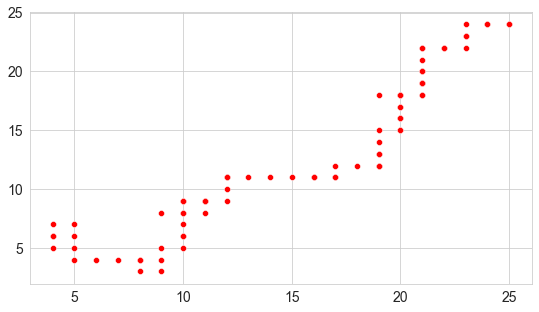

In [38]:
# plot the graph
sns.scatterplot(x=x1_values, y=x2_values, color="red")
plt.show()

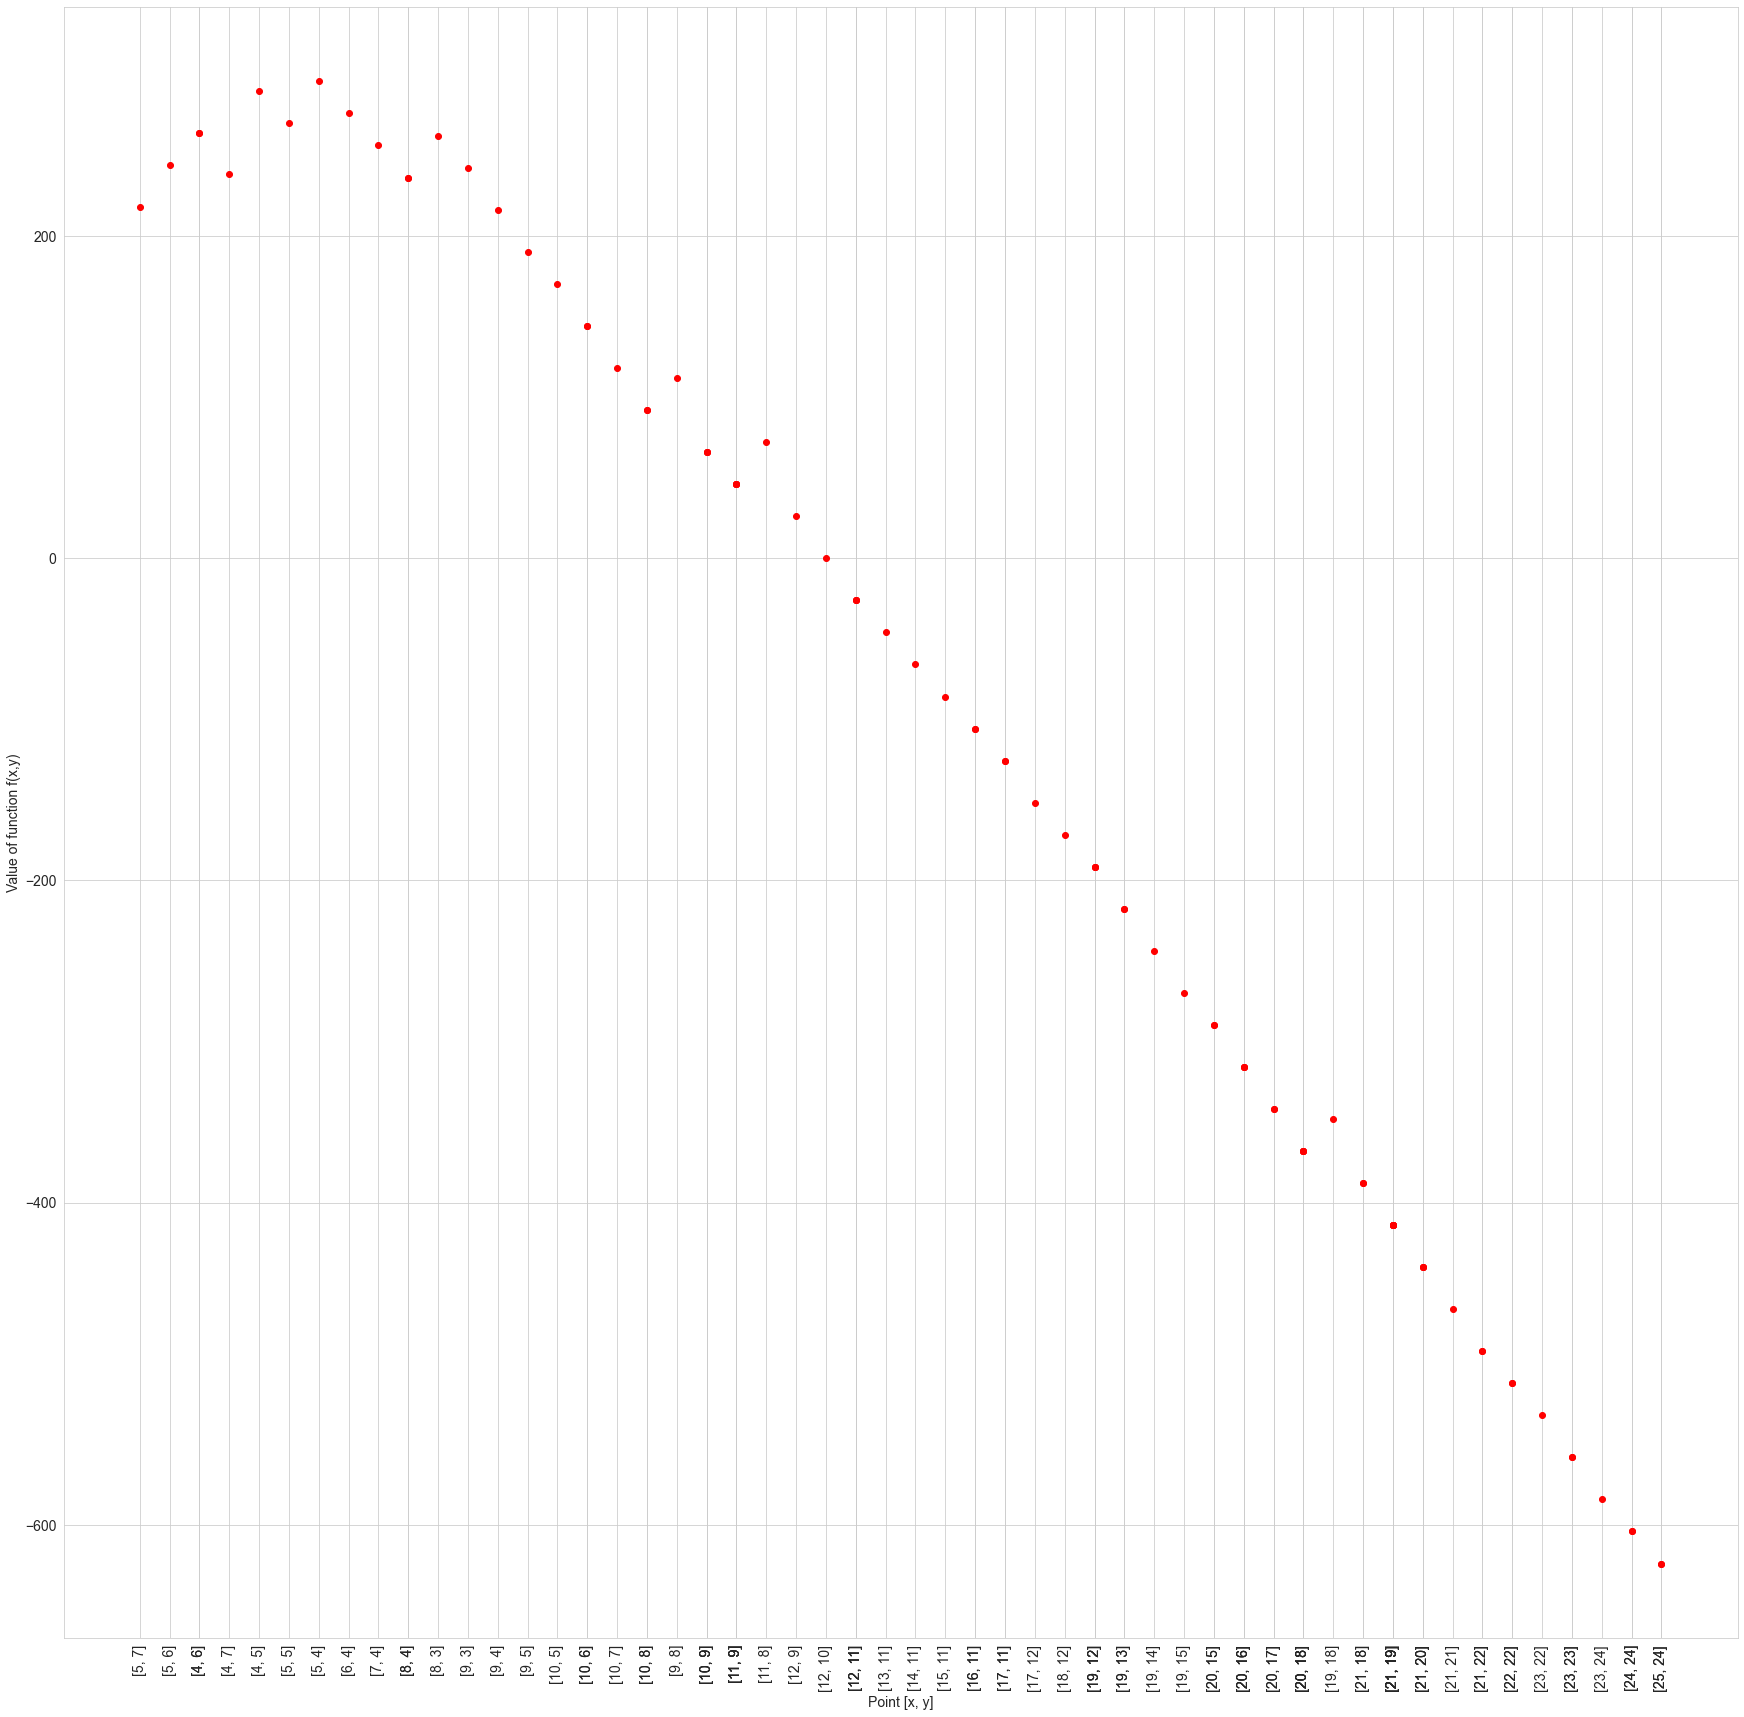

In [40]:
plt.figure(figsize=(30,30))
y1 = [f(x,y) for x,y in zip(x1_values,x2_values)]
x1 = [f"{[x,y]}" for x,y in zip(x1_values,x2_values)]
plt.scatter(x1, y1, color="red")
plt.xlabel("Point [x, y]")
plt.ylabel("Value of function f(x,y)")
plt.xticks(x1, rotation=90)
plt.show()